## v2 after first one disappeared

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt('prices250.txt')

prices = data[:,:]

# IQR investigation

<AxesSubplot:ylabel='Count'>

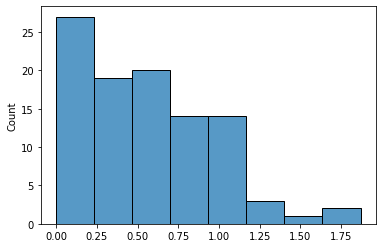

In [3]:
from scipy.stats import iqr
import seaborn as sns
iqr_data = iqr(data[221:250,], axis=0)
sns.histplot(data=iqr_data)

In [4]:
np.where(iqr_data == np.max(iqr_data))

(array([78]),)

# Correlation with straight line (monotonically increasing)

In [5]:
straight_line_ref = np.linspace(1,250,250).reshape(250,1)

In [89]:
straight_line = np.hstack((data[:,50:],straight_line_ref))

In [90]:
straight_line.shape

(250, 51)

## Focus on 10 day window for straight line

In [103]:
corr = np.corrcoef(straight_line, rowvar=False)

In [104]:
# Sort lowest to highest
np.argsort(corr[-1])

array([ 0, 14, 26,  1, 12, 40, 36,  2, 20, 10, 28, 13, 24, 43, 15,  3, 32,
       29, 22, 46, 49, 21, 31, 33, 38, 48,  5, 17, 42, 41,  7, 19, 34, 35,
       44,  8,  6,  4, 45, 11, 23, 39, 16, 30, 37, 18, 47, 27, 25,  9, 50])

In [105]:
corr[-1]

array([-6.56239913e-01, -6.49100842e-01, -6.31353690e-01, -5.70159098e-01,
       -1.37417986e-01, -4.47480304e-01, -1.38702994e-01, -4.13713266e-01,
       -3.23457702e-01,  7.52761100e-01, -6.20491902e-01,  2.62437770e-04,
       -6.46860285e-01, -5.91768063e-01, -6.56010328e-01, -5.81557357e-01,
        3.71989111e-01, -4.32911600e-01,  6.52016872e-01, -4.13033277e-01,
       -6.23536829e-01, -4.84495009e-01, -5.38380609e-01,  2.07147212e-02,
       -5.88205817e-01,  7.27446221e-01, -6.54180764e-01,  6.96093501e-01,
       -5.98479474e-01, -5.52808770e-01,  3.88944295e-01, -4.82601362e-01,
       -5.55093494e-01, -4.77224822e-01, -3.69295249e-01, -3.47932743e-01,
       -6.41925215e-01,  5.58042871e-01, -4.75452687e-01,  3.03181054e-01,
       -6.43697068e-01, -4.28450021e-01, -4.29222319e-01, -5.86393642e-01,
       -3.45409558e-01, -8.30551445e-02, -5.19942398e-01,  6.66001835e-01,
       -4.71534683e-01, -4.97794692e-01,  1.00000000e+00])

In [106]:
mono_incr = np.where(corr[-1]>0.5)

In [107]:
flat = np.where((corr[-1]>-0.2) & (corr[-1] < 0.2))

In [108]:
print(len(flat[0]))

5


In [109]:
print(len(mono_incr[0]))

7


In [110]:
mono_decr = np.where(corr[-1]<-0.5)

In [111]:
print(len(mono_decr[0]))

20


# Findings of correlation with straight line (threshold of 75%)

### 18 monotonically increasing stocks
### 15 monotonically decreasing stocks
### 10 flat

0


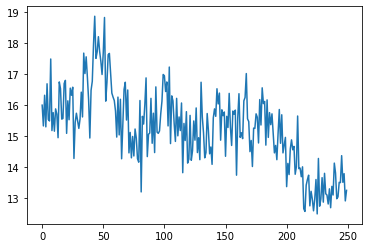

1


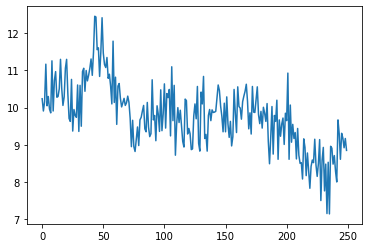

2


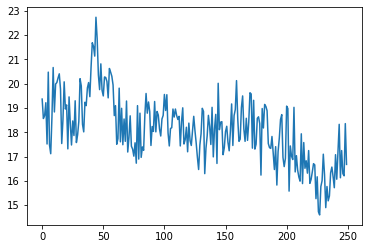

3


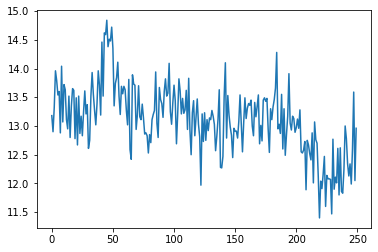

10


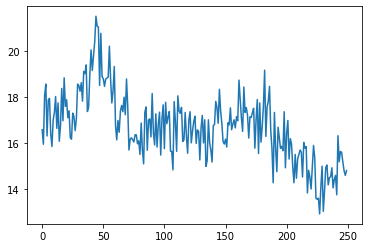

12


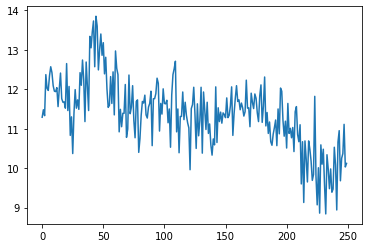

13


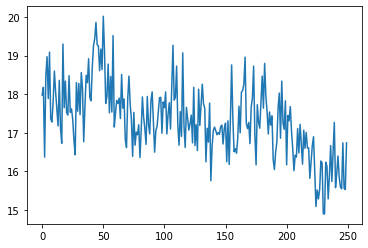

14


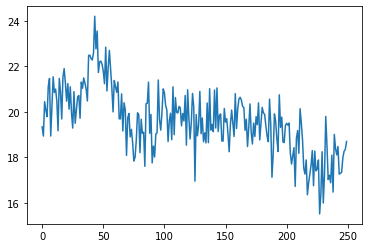

15


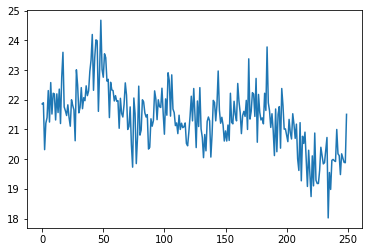

20


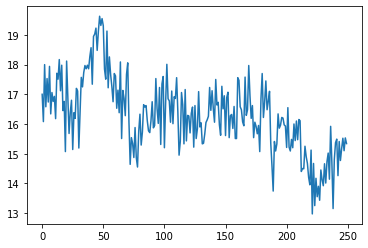

22


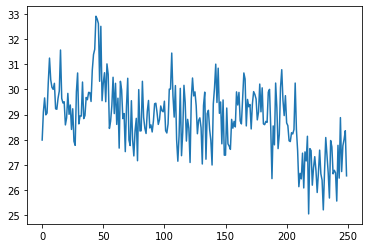

24


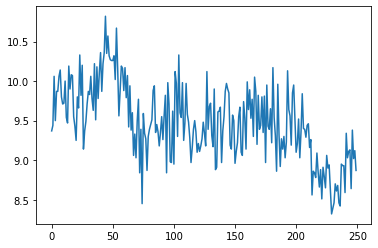

26


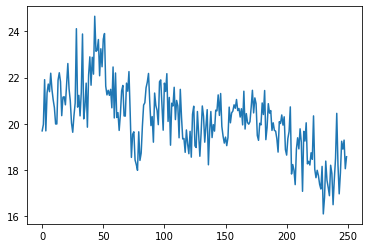

28


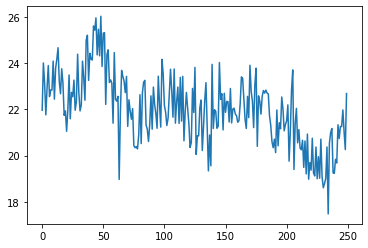

29


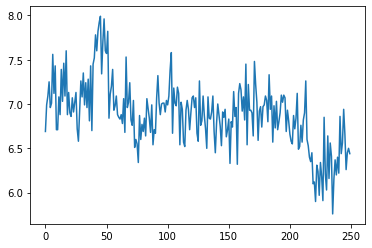

32


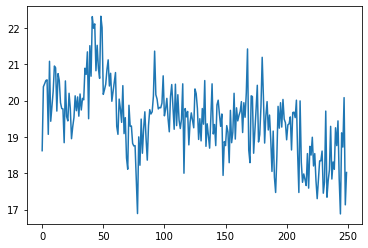

36


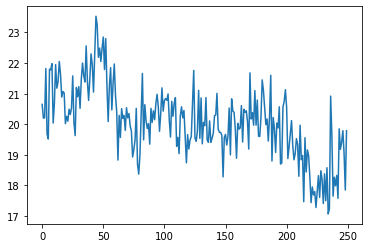

40


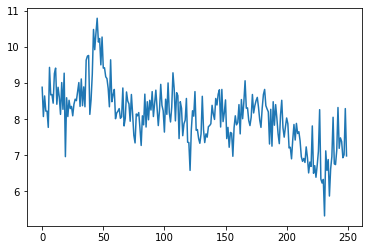

43


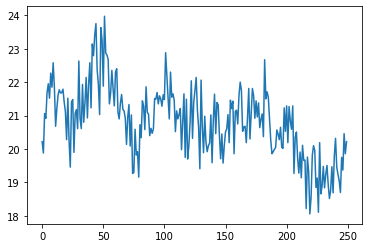

46


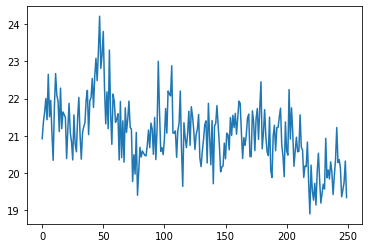

In [113]:
for index in mono_decr[0]:
    if index == 50:
        break
    sns.lineplot(data = straight_line[:,index])
    print(index)
    plt.show()

# Log experimentation

<AxesSubplot:>

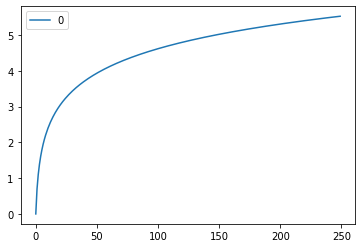

In [19]:
sns.lineplot(data = np.log(straight_line_ref))

In [211]:
log = np.hstack((data[240:250,:50],10*log_line))

In [212]:
corr = np.corrcoef(log, rowvar=False)

In [173]:
# Explore data
decr_exp = np.where(corr[-1]>0.5)
incr_exp = np.where(corr[-1]<-0.5)

no_sig_corr = np.where((corr[-1]>-0.2) & (corr[-1] < 0.2))

print("Decr: ", len(decr_exp[0]), "\nIncr: ", len(incr_exp[0]), "\nNo corr: ", len(no_sig_corr[0]))

Decr:  19 
Incr:  10 
No corr:  9


2


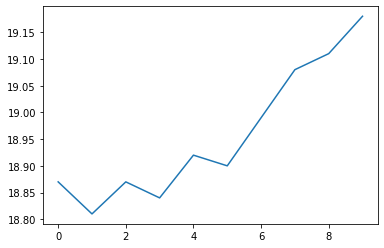

4


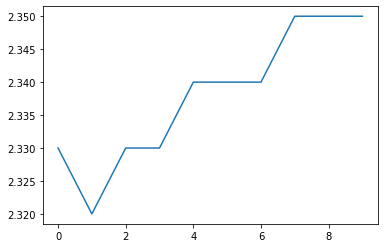

8


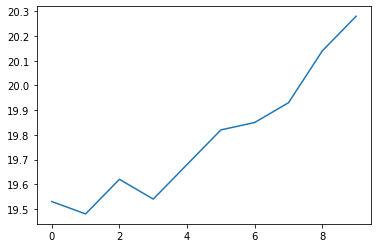

10


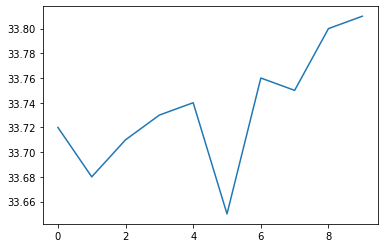

14


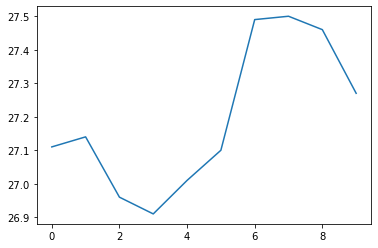

17


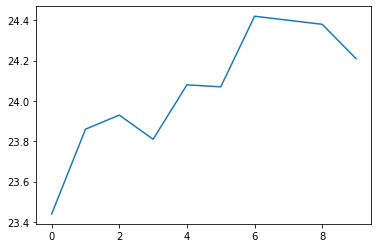

23


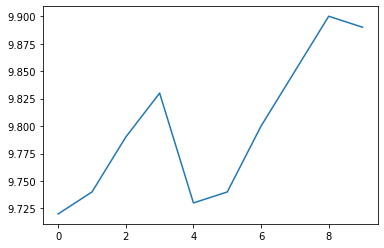

24


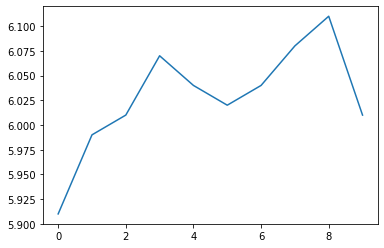

26


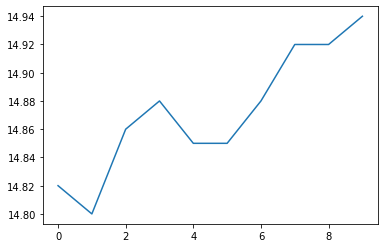

28


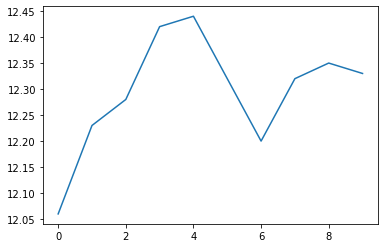

29


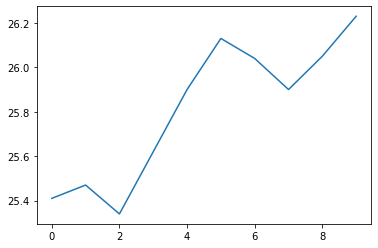

31


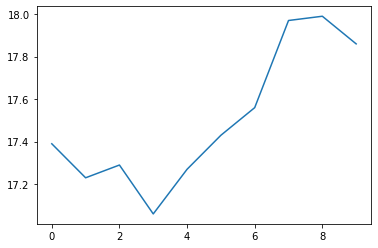

33


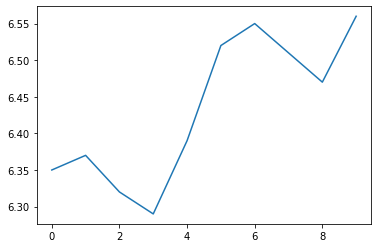

40


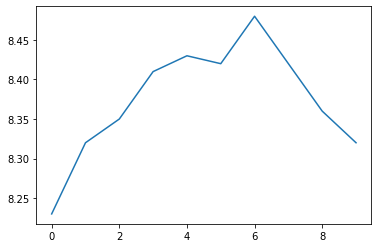

42


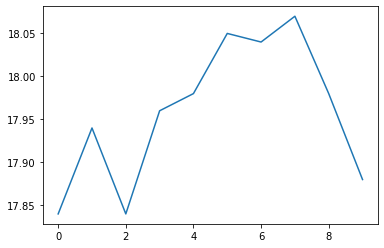

45


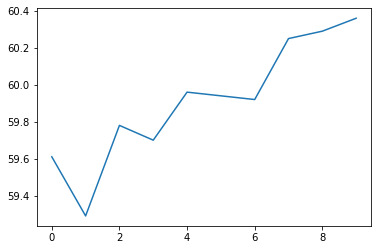

46


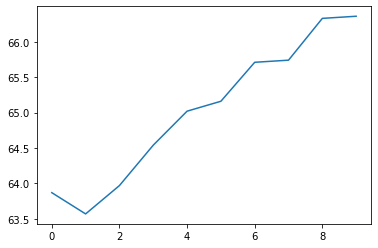

47


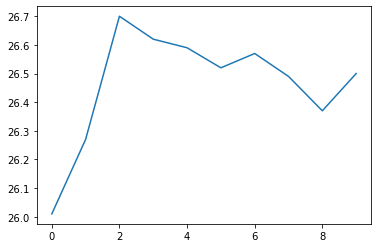

50


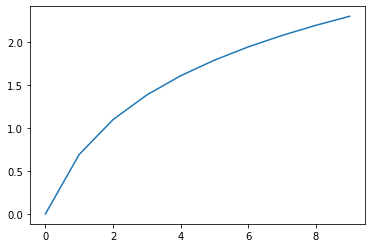

In [177]:
for index in decr_exp[0]:
    sns.lineplot(data = log[:,index])
    print(index)
    plt.show()

# Test

In [213]:
curve_or_flat = np.hstack((log,line))

In [214]:
curve_or_flat.shape

(10, 52)

<AxesSubplot:>

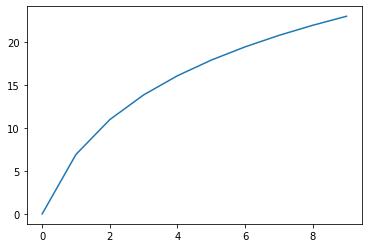

In [215]:
sns.lineplot(data=curve_or_flat[:,50])

In [232]:
corr = np.corrcoef(curve_or_flat, rowvar=False)

In [237]:
np.where(corr == np.min(corr[-2]))

(array([18, 50]), array([50, 18]))

<AxesSubplot:>

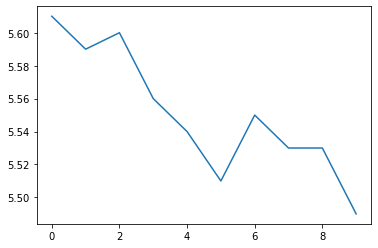

In [238]:
sns.lineplot(data=curve_or_flat[:,18])

In [228]:
up_log = np.where(corr[-2]>0.5)

log_list = []
up_list = []

for index in up_log[0]:
    if (corr[-2, index] > corr[-1, index]): log_list.append(index)
    else:up_list.append(index)

In [229]:
print(len(log_list),len(up_list))

9 11


7


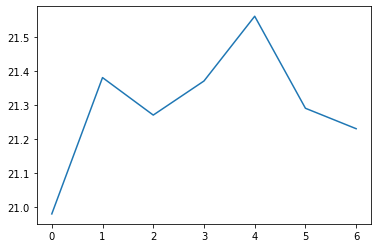

16


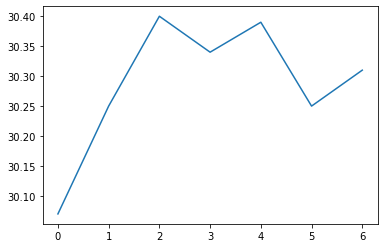

22


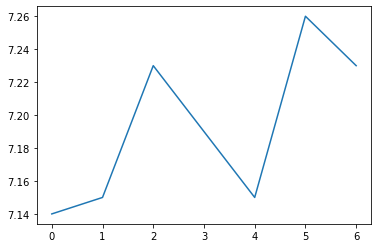

24


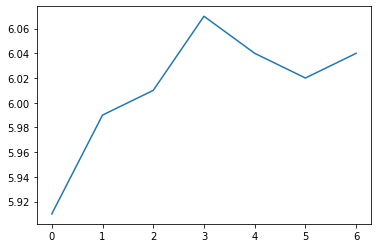

26


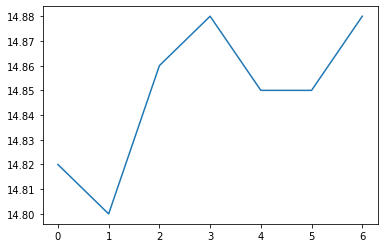

28


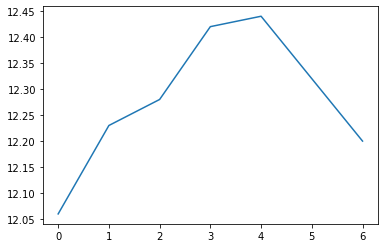

40


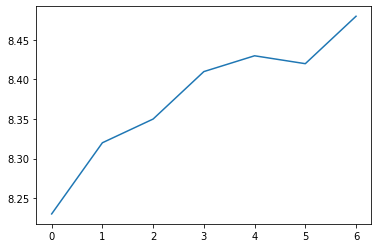

47


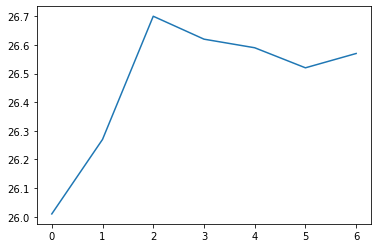

50


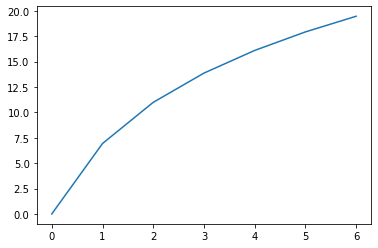

In [231]:
for index in log_list:
    sns.lineplot(data = curve_or_flat[:7,index])
    print(index)
    plt.show()

<AxesSubplot:>

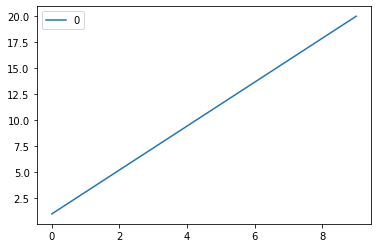

In [188]:
line = np.linspace(1,20,10).reshape(10,1)
sns.lineplot(data=line)

<AxesSubplot:>

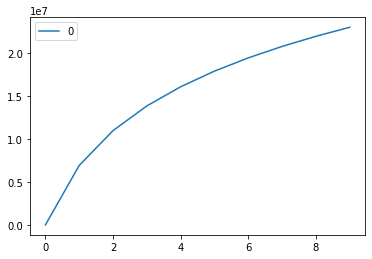

In [25]:
log_line = np.log(np.linspace(1,10,10).reshape(10,1))
sns.lineplot(data=10000000*log_line)

# Building a simple shape model

Loaded 100 instruments for 250 days


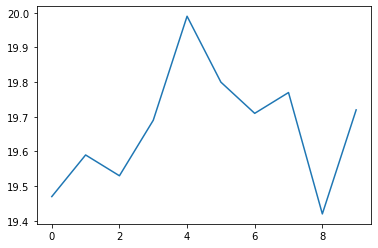

Up flat prob:  0.48666909521501095 
Down flat prob:  -0.48666909521501095 
Flat up prob:  -0.04235466695940863 
Flat down prob:  0.04235466695940863


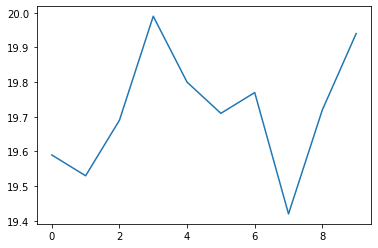

Up flat prob:  0.3604191742422891 
Down flat prob:  -0.3604191742422891 
Flat up prob:  0.29450310625322407 
Flat down prob:  -0.29450310625322407


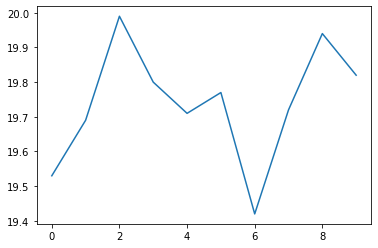

Up flat prob:  0.30665496652099034 
Down flat prob:  -0.30665496652099034 
Flat up prob:  0.27391771755414906 
Flat down prob:  -0.27391771755414906


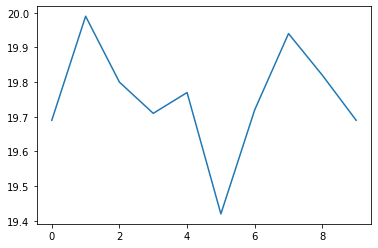

Up flat prob:  -0.13123987132007323 
Down flat prob:  0.13123987132007323 
Flat up prob:  -0.015688130141881203 
Flat down prob:  0.015688130141881203


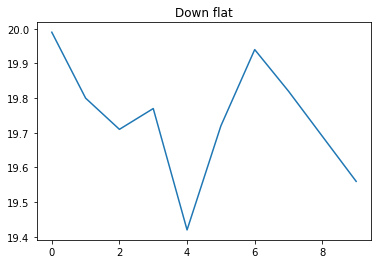

Up flat prob:  -0.5054729214529708 
Down flat prob:  0.5054729214529708 
Flat up prob:  -0.3453341138971194 
Flat down prob:  0.3453341138971194


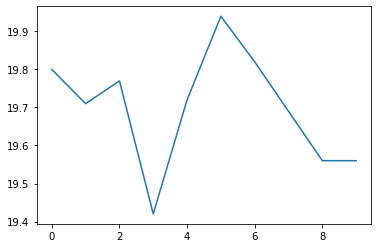

Up flat prob:  -0.21995695876079285 
Down flat prob:  0.21995695876079285 
Flat up prob:  -0.4069821262371856 
Flat down prob:  0.4069821262371856


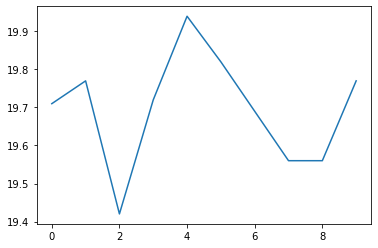

Up flat prob:  -0.0004349274008919216 
Down flat prob:  0.0004349274008919216 
Flat up prob:  -0.05789821506111081 
Flat down prob:  0.05789821506111081


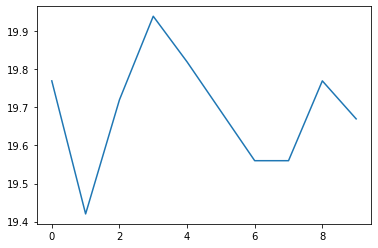

Up flat prob:  0.03426420371958659 
Down flat prob:  -0.03426420371958659 
Flat up prob:  -0.07161399667807396 
Flat down prob:  0.07161399667807396


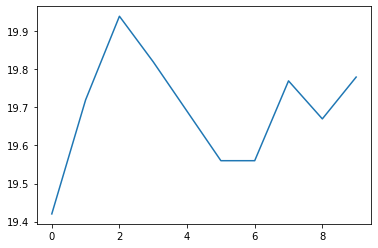

Up flat prob:  0.37484277509288716 
Down flat prob:  -0.37484277509288716 
Flat up prob:  0.15459185703042902 
Flat down prob:  -0.15459185703042902


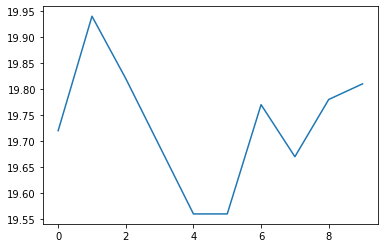

Up flat prob:  -0.29077886088525134 
Down flat prob:  0.29077886088525134 
Flat up prob:  0.19044564720984836 
Flat down prob:  -0.19044564720984836


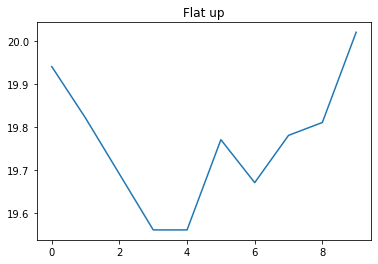

Up flat prob:  -0.29348056540254813 
Down flat prob:  0.29348056540254813 
Flat up prob:  0.5887116120604863 
Flat down prob:  -0.5887116120604863


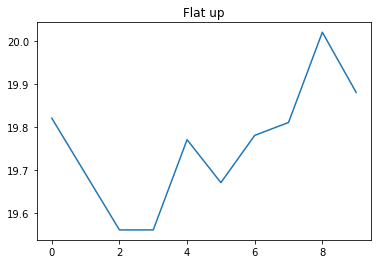

Up flat prob:  0.1771615054757103 
Down flat prob:  -0.1771615054757103 
Flat up prob:  0.671484560649567 
Flat down prob:  -0.671484560649567


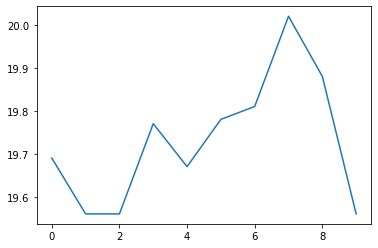

Up flat prob:  0.4049693442015851 
Down flat prob:  -0.4049693442015851 
Flat up prob:  0.05403456594559473 
Flat down prob:  -0.05403456594559473


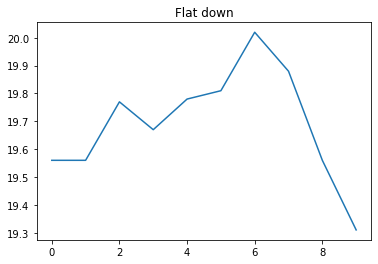

Up flat prob:  0.26735187318907166 
Down flat prob:  -0.26735187318907166 
Flat up prob:  -0.5371315722077679 
Flat down prob:  0.5371315722077679


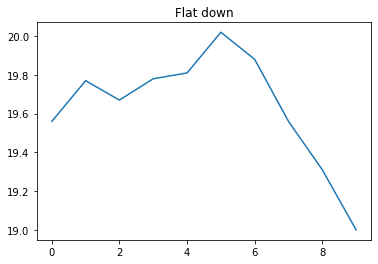

Up flat prob:  -0.09325949050622057 
Down flat prob:  0.09325949050622057 
Flat up prob:  -0.8546235880078239 
Flat down prob:  0.8546235880078239


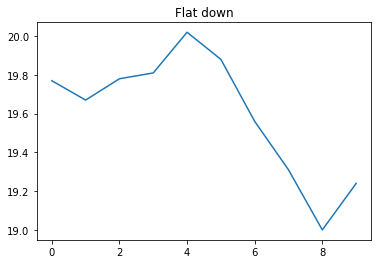

Up flat prob:  -0.36695931100857115 
Down flat prob:  0.36695931100857115 
Flat up prob:  -0.7926779143417223 
Flat down prob:  0.7926779143417223


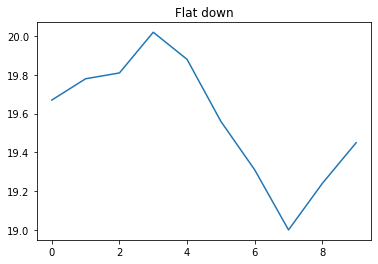

Up flat prob:  -0.4139349290720542 
Down flat prob:  0.4139349290720542 
Flat up prob:  -0.5436263205400902 
Flat down prob:  0.5436263205400902


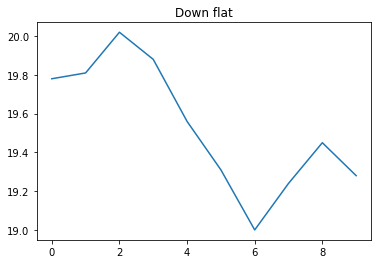

Up flat prob:  -0.6144406866207384 
Down flat prob:  0.6144406866207384 
Flat up prob:  -0.5106583460638082 
Flat down prob:  0.5106583460638082


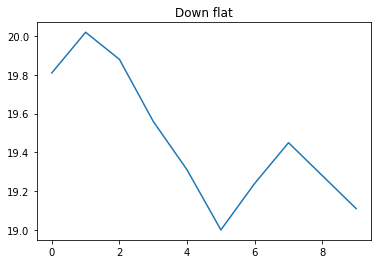

Up flat prob:  -0.7567062325143099 
Down flat prob:  0.7567062325143099 
Flat up prob:  -0.5499714493459614 
Flat down prob:  0.5499714493459614


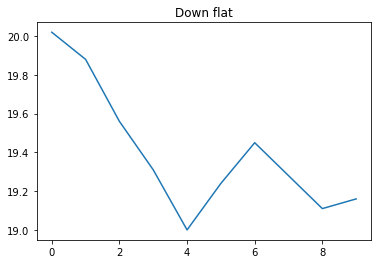

Up flat prob:  -0.8981920902153161 
Down flat prob:  0.8981920902153161 
Flat up prob:  -0.48652403280866063 
Flat down prob:  0.48652403280866063


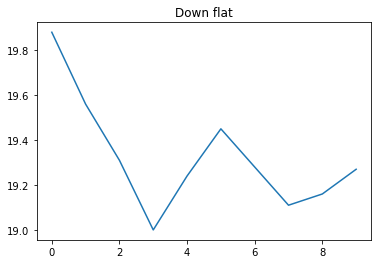

Up flat prob:  -0.8329474919242624 
Down flat prob:  0.8329474919242624 
Flat up prob:  -0.3111847821716194 
Flat down prob:  0.3111847821716194


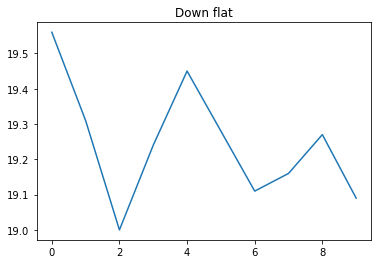

Up flat prob:  -0.5748180009851463 
Down flat prob:  0.5748180009851463 
Flat up prob:  -0.37476362586862105 
Flat down prob:  0.37476362586862105


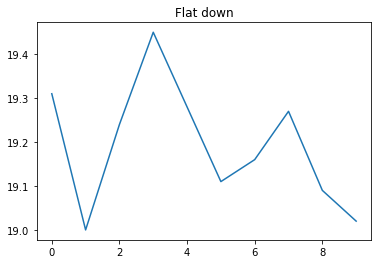

Up flat prob:  -0.17540712326104246 
Down flat prob:  0.17540712326104246 
Flat up prob:  -0.502548396909577 
Flat down prob:  0.502548396909577


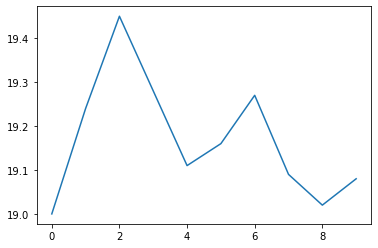

Up flat prob:  0.06013418230094778 
Down flat prob:  -0.06013418230094778 
Flat up prob:  -0.44025214866096013 
Flat down prob:  0.44025214866096013


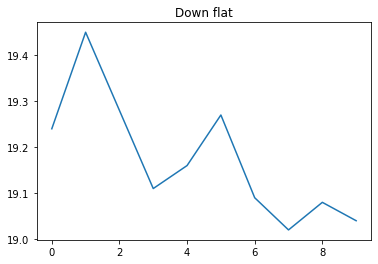

Up flat prob:  -0.6207665233366292 
Down flat prob:  0.6207665233366292 
Flat up prob:  -0.6154888211121289 
Flat down prob:  0.6154888211121289


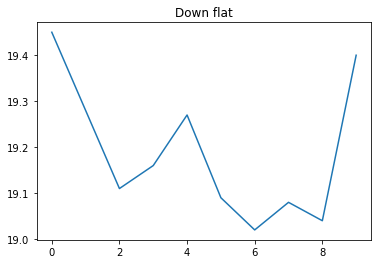

Up flat prob:  -0.6183537932149283 
Down flat prob:  0.6183537932149283 
Flat up prob:  0.1127483524571246 
Flat down prob:  -0.1127483524571246


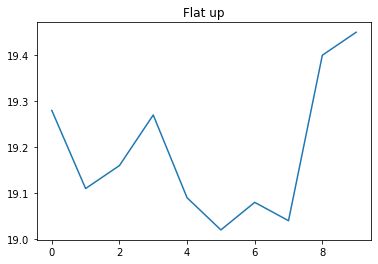

Up flat prob:  -0.05687888852538022 
Down flat prob:  0.05687888852538022 
Flat up prob:  0.6504090892605334 
Flat down prob:  -0.6504090892605334


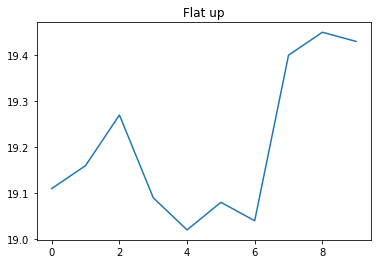

Up flat prob:  0.298870970463509 
Down flat prob:  -0.298870970463509 
Flat up prob:  0.7542146771824748 
Flat down prob:  -0.7542146771824748


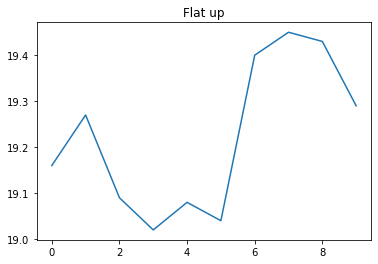

Up flat prob:  0.2703968487321133 
Down flat prob:  -0.2703968487321133 
Flat up prob:  0.5263360904107431 
Flat down prob:  -0.5263360904107431


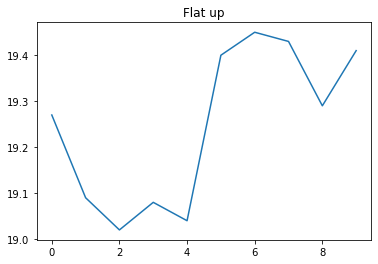

Up flat prob:  0.3460083582620035 
Down flat prob:  -0.3460083582620035 
Flat up prob:  0.5412556685121496 
Flat down prob:  -0.5412556685121496


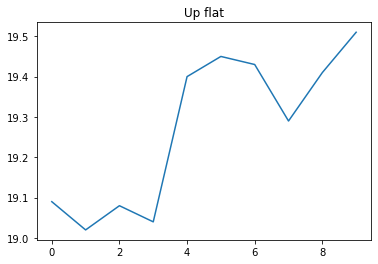

Up flat prob:  0.7086561063999526 
Down flat prob:  -0.7086561063999526 
Flat up prob:  0.6454259853160078 
Flat down prob:  -0.6454259853160078


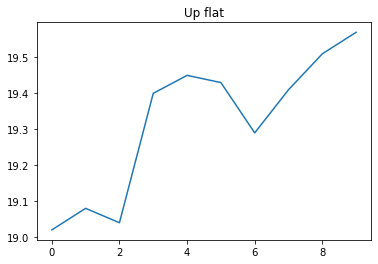

Up flat prob:  0.8285378313718709 
Down flat prob:  -0.8285378313718709 
Flat up prob:  0.6695053064175674 
Flat down prob:  -0.6695053064175674


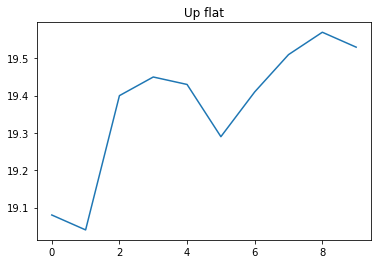

Up flat prob:  0.8446500985040528 
Down flat prob:  -0.8446500985040528 
Flat up prob:  0.6017237924641381 
Flat down prob:  -0.6017237924641381


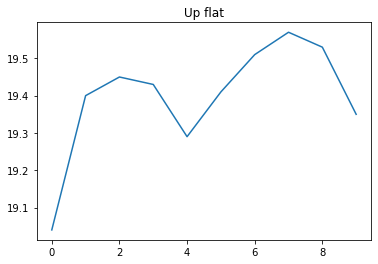

Up flat prob:  0.7623092371526721 
Down flat prob:  -0.7623092371526721 
Flat up prob:  0.22674487324379236 
Flat down prob:  -0.22674487324379236


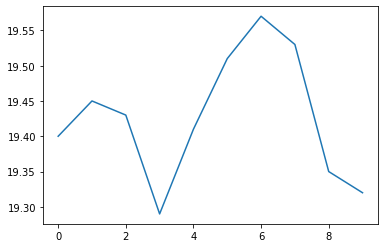

Up flat prob:  0.10270378043341921 
Down flat prob:  -0.10270378043341921 
Flat up prob:  -0.31697518592239493 
Flat down prob:  0.31697518592239493


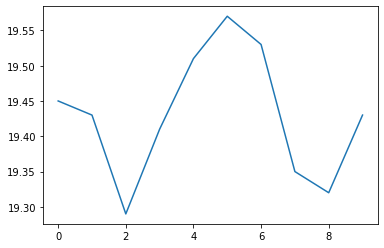

Up flat prob:  0.03577593547311318 
Down flat prob:  -0.03577593547311318 
Flat up prob:  -0.19371690181802542 
Flat down prob:  0.19371690181802542


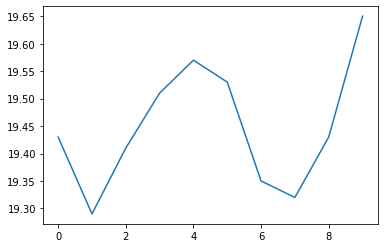

Up flat prob:  0.29324828011674464 
Down flat prob:  -0.29324828011674464 
Flat up prob:  0.4308276262756814 
Flat down prob:  -0.4308276262756814


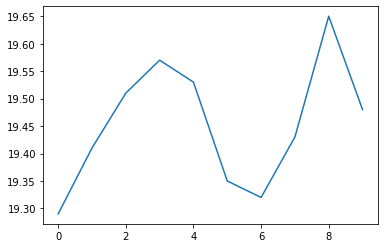

Up flat prob:  0.44598646913471207 
Down flat prob:  -0.44598646913471207 
Flat up prob:  0.3045022601987417 
Flat down prob:  -0.3045022601987417


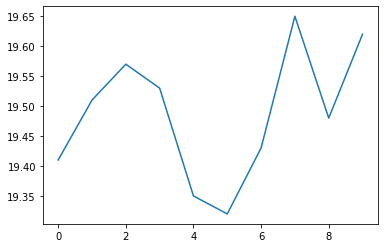

Up flat prob:  0.16011307727419316 
Down flat prob:  -0.16011307727419316 
Flat up prob:  0.4611416849353439 
Flat down prob:  -0.4611416849353439


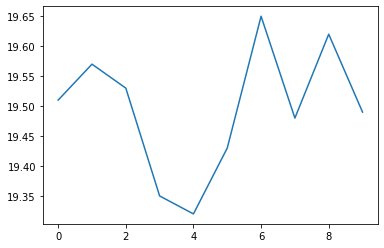

Up flat prob:  -0.08283033909541623 
Down flat prob:  0.08283033909541623 
Flat up prob:  0.2234860729138789 
Flat down prob:  -0.2234860729138789


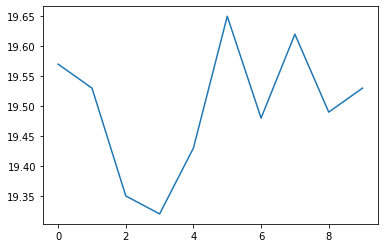

Up flat prob:  -0.04603439090165973 
Down flat prob:  0.04603439090165973 
Flat up prob:  0.22429193133325825 
Flat down prob:  -0.22429193133325825


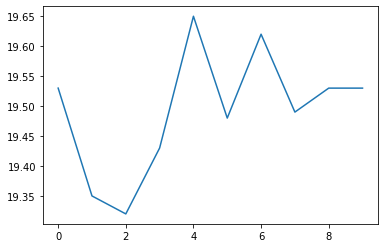

Up flat prob:  0.3019866110512447 
Down flat prob:  -0.3019866110512447 
Flat up prob:  0.26878218124342607 
Flat down prob:  -0.26878218124342607


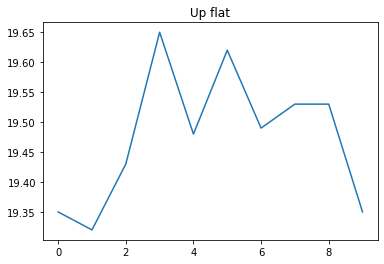

Up flat prob:  0.5597062376367097 
Down flat prob:  -0.5597062376367097 
Flat up prob:  -0.16312345054066527 
Flat down prob:  0.16312345054066527


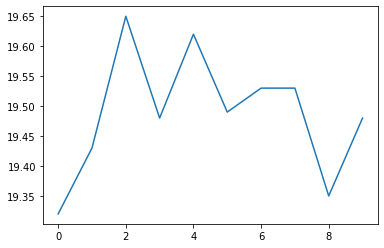

Up flat prob:  0.4416593013591976 
Down flat prob:  -0.4416593013591976 
Flat up prob:  -0.18336649469833702 
Flat down prob:  0.18336649469833702


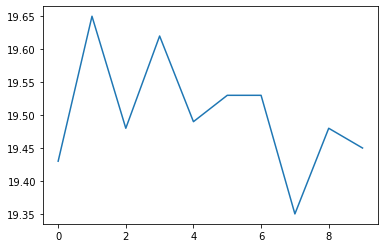

Up flat prob:  -0.10935671342557803 
Down flat prob:  0.10935671342557803 
Flat up prob:  -0.3892834318848916 
Flat down prob:  0.3892834318848916


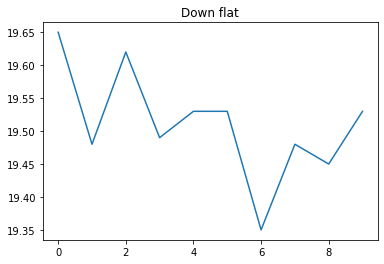

Up flat prob:  -0.6062782548446786 
Down flat prob:  0.6062782548446786 
Flat up prob:  -0.20824908755568064 
Flat down prob:  0.20824908755568064


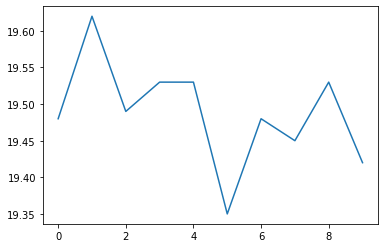

Up flat prob:  -0.3348483909816563 
Down flat prob:  0.3348483909816563 
Flat up prob:  -0.31587174904733223 
Flat down prob:  0.31587174904733223


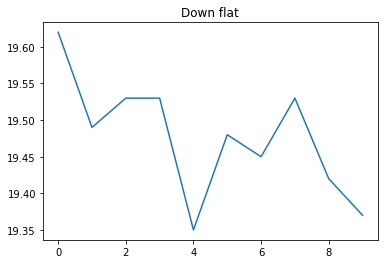

Up flat prob:  -0.6815370464215988 
Down flat prob:  0.6815370464215988 
Flat up prob:  -0.5468126275612674 
Flat down prob:  0.5468126275612674


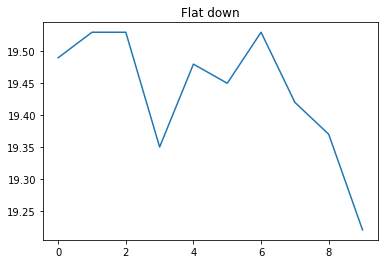

Up flat prob:  -0.43414836054145045 
Down flat prob:  0.43414836054145045 
Flat up prob:  -0.8192376618593424 
Flat down prob:  0.8192376618593424


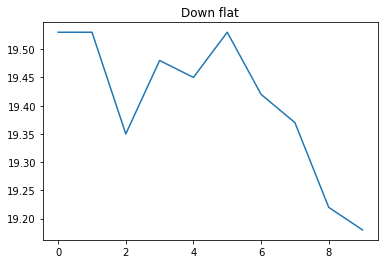

Up flat prob:  -0.5404790190849982 
Down flat prob:  0.5404790190849982 
Flat up prob:  -0.8734817253126569 
Flat down prob:  0.8734817253126569


In [482]:
# eval.py

#!/usr/bin/envblah python

import numpy as np
import pandas as pd

# Algorithm testing file. 
# Quantitative judging will be determined from output of this program.
# Judging will use unseeen, future price data from the same universe.

nInst = 0
nt = 0

# Commission rate.
commRate = 0.0050

# Dollar position limit (maximum absolute dollar value of any individual stock position).
dlrPosLimit = 10000

def loadPrices(fn):
    global nt, nInst
    df=pd.read_csv(fn, sep='\s+', header=None, index_col=None)
    nt, nInst = df.values.shape
    return (df.values).T

pricesFile="./prices250.txt"
prcAll = loadPrices(pricesFile)
print ("Loaded %d instruments for %d days" % (nInst, nt))

def calcPL(prcHist):
    cash = 0
    curPos = np.zeros(nInst)
    totDVolume = 0
    totDVolume0 = 0
    totDVolume1 = 0
    frac0 = 0.
    frac1 = 0.
    value = 0
    todayPLL = []
    (_,nt) = prcHist.shape
    
    global currentPos
    currentPos = np.zeros(100)
    global buys
    buys = []
    global sells 
    sells = []
    global previousShape
    previousShape = 'flat'

    for t in range(201,251):
        prcHistSoFar = prcHist[:,:t]
        currentPos += shapePos(currentPos,prcHistSoFar)
        newPosOrig = currentPos
        curPrices = prcHistSoFar[:,-1]
        posLimits = np.array([int(x) for x in dlrPosLimit / curPrices])
        newPos = np.array([int(p) for p in np.clip(newPosOrig, -posLimits, posLimits)])
        deltaPos = newPos - curPos
        dvolumes = curPrices * np.abs(deltaPos)
        dvolume0 = np.sum(dvolumes[:50])
        dvolume1 = np.sum(dvolumes[50:])
        dvolume = np.sum(dvolumes)
        totDVolume += dvolume
        totDVolume0 += dvolume0
        totDVolume1 += dvolume1
        comm = dvolume * commRate
        cash -= curPrices.dot(deltaPos) + comm
        curPos = np.array(newPos)
        posValue = curPos.dot(curPrices)
        todayPL = cash + posValue - value
        todayPLL.append(todayPL)
        value = cash + posValue
        ret = 0.0
        if (totDVolume > 0):
            ret = value / totDVolume
            frac0 = totDVolume0 / totDVolume
            frac1 = totDVolume1 / totDVolume
#         print ("Day %d value: %.2lf todayPL: $%.2lf $-traded: %.0lf return: %.5lf frac0: %.4lf frac1: %.4lf" % (t,value, todayPL, totDVolume, ret, frac0, frac1))
    pll = np.array(todayPLL)
    (plmu,plstd) = (np.mean(pll), np.std(pll))
    annSharpe = 0.0
    if (plstd > 0):
        annSharpe = 16 * plmu / plstd
    return (plmu, ret, annSharpe, totDVolume)

# Output.
(meanpl, ret, sharpe, dvol) = calcPL(prcAll)
# print ("=====")
# print ("mean(PL): %.0lf" % meanpl)
# print ("return: %.5lf" % ret)
# print ("annSharpe(PL): %.2lf " % sharpe)
# print ("totDvolume: %.0lf " % dvol)

In [283]:
print(sells)

[(1, 19.94), (2, 19.82), (6, 19.77), (7, 19.67), (9, 19.81), (10, 20.02), (16, 19.45), (20, 19.27), (25, 19.4), (26, 19.45), (27, 19.43), (30, 19.51), (31, 19.57), (36, 19.65), (41, 19.53), (44, 19.45)]


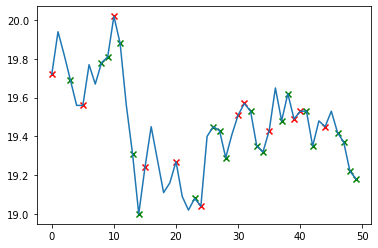

In [317]:
plt.plot(prices[200:251,0])
plt.scatter([i[0] for i in buys], [i[1] for i in buys], marker = 'x', color='red')
plt.scatter([i[0] for i in sells], [i[1] for i in sells], marker = 'x', color='green')

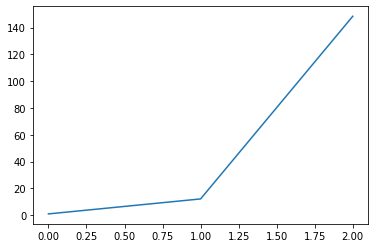

In [470]:
plt.plot(np.exp(5*straight_line_test))

In [460]:
window = 3
straight_line_test = np.linspace(0,1,window)

In [481]:
def shapePos(currentPos,prcSoFar):
    
    # Window threshold subject to optimisation
    window = 10
    
    # Focus on first stock for now, then expand
    shape = prcSoFar[0,]
    
    # Create empty position vector
    pos = np.zeros(100)
    
    # Define exponential patterns to look for matches against
    up_flat_exp = -np.exp(-5*np.linspace(0,1,window))
    down_flat_exp = np.exp(-5*np.linspace(0,1,window))
    flat_up_exp = np.exp(5*np.linspace(0,1,window))
    flat_down_exp = -np.exp(5*np.linspace(0,1,window))
    
    # Stack matrixes for cross-correlation calculations
    up_flat = np.vstack((shape[-window:],up_flat_exp))
    down_flat = np.vstack((shape[-window:],down_flat_exp))
    flat_up = np.vstack((shape[-window:],flat_up_exp))
    flat_down = np.vstack((shape[-window:],flat_down_exp))
    
    # Calculate correlation
    up_flat_corr = np.corrcoef(up_flat,rowvar=True)
    down_flat_corr = np.corrcoef(down_flat,rowvar=True)
    flat_up_corr = np.corrcoef(flat_up,rowvar=True)
    flat_down_corr = np.corrcoef(flat_down,rowvar=True)
    
    ## Looking ok
    plt.plot(shape[-window:])
    # Categorise current window
    if (up_flat_corr[-1,0] > 0.5): plt.title("Up flat")
    elif (down_flat_corr[-1,0] > 0.5): plt.title("Down flat")
    elif (flat_up_corr[-1,0] > 0.5): plt.title("Flat up")
    elif (flat_down_corr[-1,0] > 0.5): plt.title("Flat down")
    plt.show()
    print("Up flat prob: ", up_flat_corr[-1,0], "\nDown flat prob: ", down_flat_corr[-1,0], "\nFlat up prob: ", flat_up_corr[-1,0], "\nFlat down prob: ", flat_down_corr[-1,0])
    
    return pos

In [332]:
# import numpy as np

# def shapePos(currentPos, prcSoFar):
        
#     # Window size subject to optimisation
#     window = 3
    
#     # Note: prcSoFar is a transposed version of prices250.txt so stocks are the rows
#     shape = prcSoFar[0,]
    
#     # For volatile testing, position of 0's for first 50 stocks
#     pos = np.zeros(100)
    
#     straight_line_ref = np.linspace(1,window,window).reshape(1,window)
#     straight_line = np.vstack((shape[-window:],straight_line_ref))    
#     log = np.vstack((shape[-window:,], 10000*np.log(straight_line_ref)))
#     neg_log = np.vstack((shape[-window:,], -1*np.log(40*straight_line_ref)))

#     corr = np.corrcoef(straight_line,rowvar=True)
#     corr_log = np.corrcoef(log,rowvar=True)
#     corr_neg_log = np.corrcoef(neg_log,rowvar=True)

#     up = np.where(corr[-1] > 0.5)
#     up_flat = np.where(corr_log[-1] > 0.5)
#     up_flat = up_flat[0][:-1]
    
#     up_flat_list = []
#     up_list = []

#     for index in up_flat:
#         print(corr_log[-1,index], corr[-1,index])
#         if (corr_log[-1, index] > corr[-1, index]-0.1): up_flat_list.append(index)
#         else: up_list.append(index)
        
#     down = np.where(corr[-1] < -0.5)
#     down_flat = np.where(corr_neg_log[-1] > 0.5)
#     down_flat = down_flat[0][:-1]
    
#     flat = np.where((corr[-1] >-0.2) & (corr[-1] < 0.2))
    
#     down_flat_list = []
#     down_list = []

#     for index in down_flat:
#         print(corr_neg_log[-1,index], corr[-1,index])
#         if (corr_neg_log[-1, index] > -1*corr[-1, index]): down_flat_list.append(index)
#         else: down_list.append(index)
        
#     plt.plot(shape[-window:])
#     if (len(up_list)):
#         plt.title("Up")
#         plt.scatter(window-1, shape[-1], marker = 'x', color='red')
#         buys.append((len(shape)-201,shape[-1]))
#     elif (len(up_flat_list)):
#         plt.title("Up flattening")
#         plt.scatter(window-1, shape[-1], marker = 'x', color='green')
#         sells.append((len(shape)-201,shape[-1]))
#     elif (len(down_list)):
#         plt.title("Down")
#         plt.scatter(window-1, shape[-1], marker = 'x', color='green')
#         sells.append((len(shape)-201,shape[-1]))
#     elif (len(down_flat_list)):
#         plt.title("Down flattening")
#         plt.scatter(window-1, shape[-1], marker = 'x', color='red')
#         buys.append((len(shape)-201,shape[-1]))
#     elif (len(flat[0])):
#         plt.title("Flat")
#         if (currentPos[0] > 0): 
#             plt.scatter(window-1, shape[-1], marker = 'x', color='green')
#             sells.append((len(shape)-201,shape[-1]))
#         if (currentPos[0] < 0): 
#             plt.scatter(window-1, shape[-1], marker = 'x', color='red')
#             buys.append((len(shape)-201,shape[-1]))
#     plt.show()
    
#     print("Flat score: ", corr[-1,0], "Up flat: ", corr_log[-1,0], "Down flat: ", corr_neg_log[-1,0])
    
#     for num in up_list:
#         pos[num] = 1*1000*corr[-1,num]
#     for num in up_flat_list:
#         pos[num] = -1*1000*corr_log[-1,num]
#     for num in down_list: 
#         pos[num] = 1000*corr[-1,num]
#     for num in down_flat_list: 
#         pos[num] = -1*1000*corr[-1,num]
# #     for num in flat[0]: 
# #         currentPos[num] != 0: pos[num] = 2*currentPos[num]*-1

#     print(pos[0])
#     return pos

# Exploring overall correlation and lagging & leading indicators

In [ ]:
data_double = np.concatenate((data[201:250,:], data[200:249,:]), axis=1)
corr_test = np.corrcoef(data_double,rowvar=False)

In [ ]:
# Sort for specific correlation
np.argsort(corr_test[41])

In [83]:
# Minimum total score
corr_test = np.corrcoef(data_double)
np.min(corr_test)

-0.950781094710656

In [84]:
np.where(corr_test==np.min(corr_test))

(array([ 26, 149]), array([149,  26]))

<AxesSubplot:>

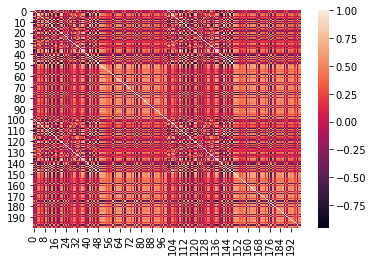

In [70]:
sns.heatmap(corr_test)

In [32]:
np.argsort(corr_test)

array([[ 11,  37, 106, ...,  18, 100,   0],
       [143,  43,  10, ...,  17, 101,   1],
       [ 46, 146, 111, ...,  41, 102,   2],
       ...,
       [136,  36,  21, ..., 177,  75, 197],
       [108,   8,  59, ...,  55, 181, 198],
       [ 41, 141,  59, ...,  93,  50, 199]])

In [33]:
corr_test[0,118]

0.7159248479213203

In [34]:
max_min = np.min(corr_test[0])

for row in corr_test:
    min_row = np.min(row)
    print(min_row)
    if min_row > max_min: max_min = min_row
        
print(max_min)

-0.7512174898425874
-0.4856767065597072
-0.713013242345403
-0.8558235760238285
-0.8284836339560058
-0.7481559245577664
-0.7694696270814373
-0.48260311368960185
-0.9265014793416253
-0.9169359396304086
-0.75526693711436
-0.8578124068421848
-0.8250667387271089
-0.9447734347978372
-0.8028032512675376
-0.8671909576596164
-0.6821765172883413
-0.5343017496040133
-0.8791847197363931
-0.5761919962799786
-0.879184719736393
-0.9084726822280502
-0.9259470480995158
-0.5176105147741898
-0.5051054695633913
-0.7449979919655478
-0.9424913988396396
-0.5251579090556853
-0.7045956838256028
-0.5023053331689528
-0.7833213736310736
-0.7987171965163952
-0.628936501572372
-0.5849121332613179
-0.6759976492402392
-0.6427104169660159
-0.8672834119057449
-0.7719904226339699
-0.8644443550034208
-0.6246976639834989
-0.715611683949707
-0.9536871841751734
-0.9195445400570439
-0.8644443550034207
-0.8124504493050095
-0.7691867582298877
-0.825969475911635
-0.7857461303960461
-0.8240485575156676
-0.9536871841751734
-0.711

<AxesSubplot:>

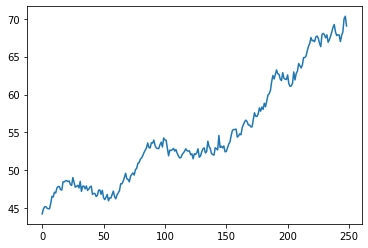

In [35]:
sns.lineplot(data = data_double[:,41])
#plt.axvline(x=78)

<AxesSubplot:>

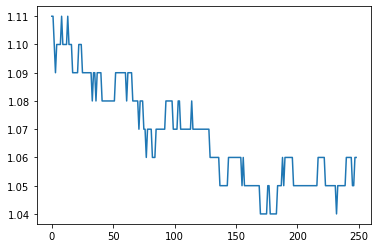

In [36]:
sns.lineplot(data = data_double[:,11])
#plt.axvline(x=83)

In [37]:
data_double[145:165,105]

array([ 9.8 ,  9.82, 10.09, 10.13, 10.05,  9.82,  9.66,  9.52,  9.54,
        9.35,  9.34,  9.33,  9.44,  9.2 ,  9.29,  9.38,  9.27,  9.22,
        9.25,  9.25])

In [38]:
data_double[140:160,0]

array([19.98, 20.21, 20.22, 20.39, 20.2 , 20.4 , 20.55, 20.55, 20.56,
       20.58, 20.39, 20.39, 20.29, 20.55, 20.82, 20.89, 20.81, 20.85,
       20.7 , 20.85])

# Visualising all 100 instruments

0


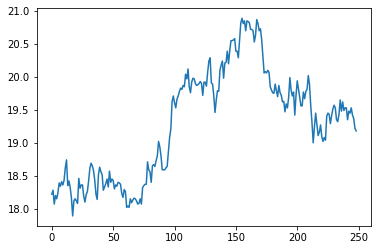

1


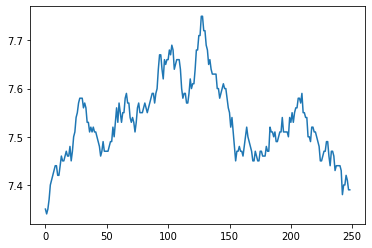

2


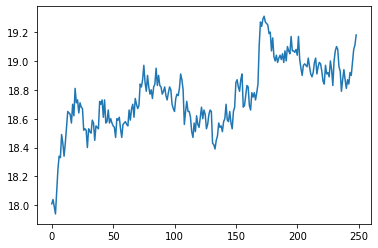

3


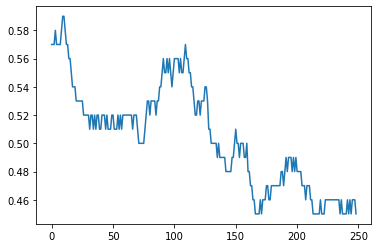

4


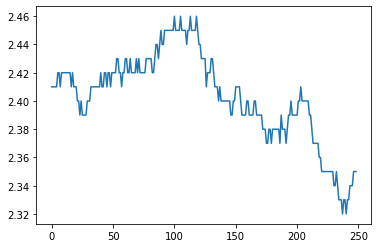

5


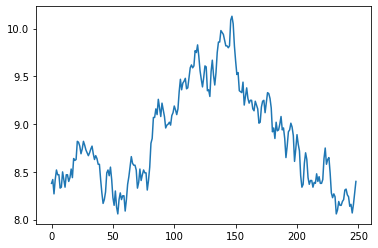

6


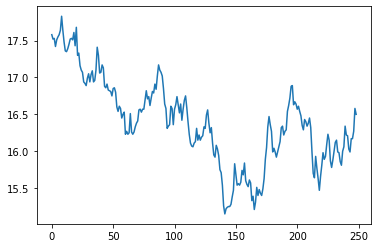

7


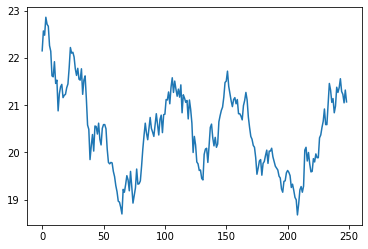

8


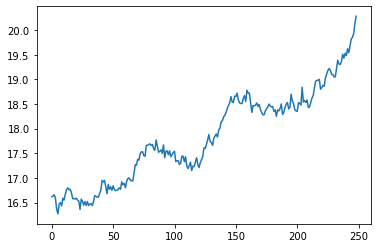

9


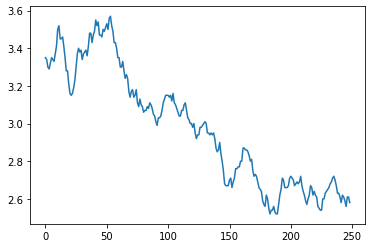

10


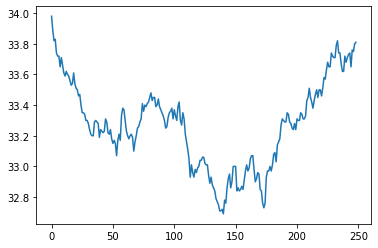

11


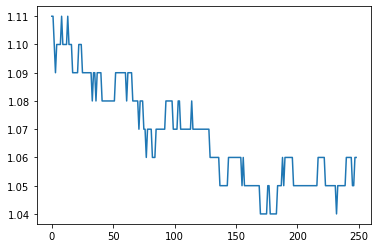

12


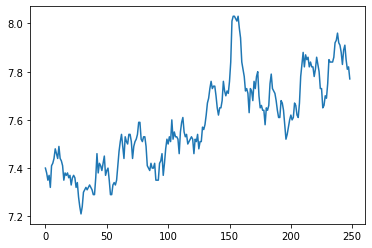

13


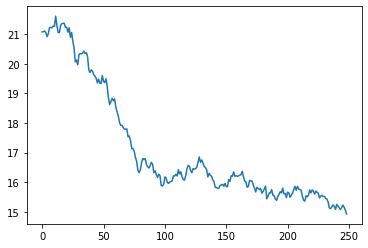

14


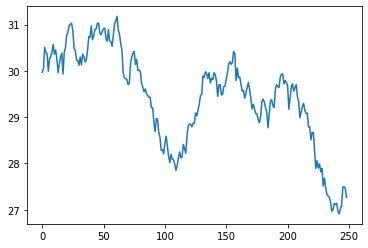

15


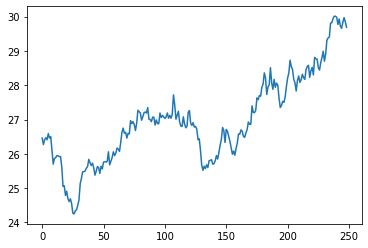

16


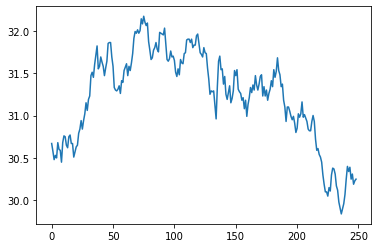

17


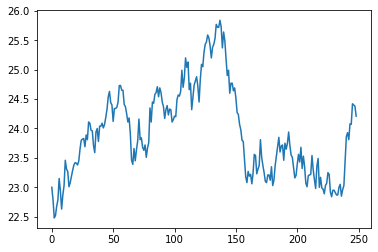

18


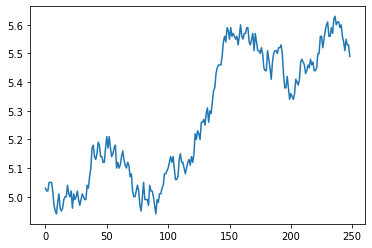

19


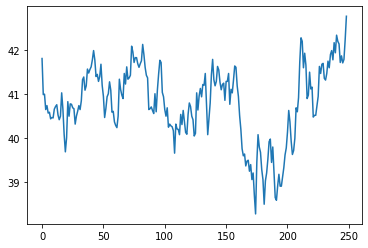

20


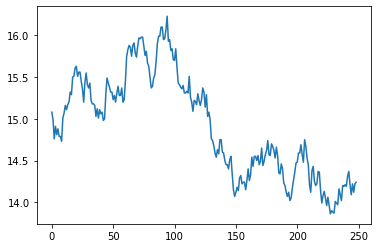

21


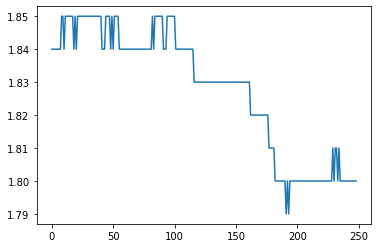

22


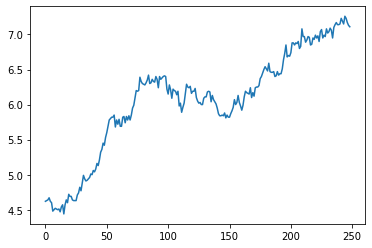

23


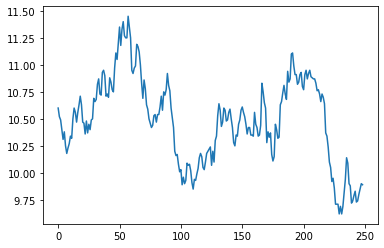

24


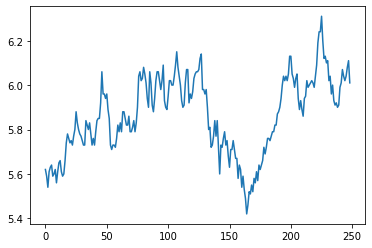

25


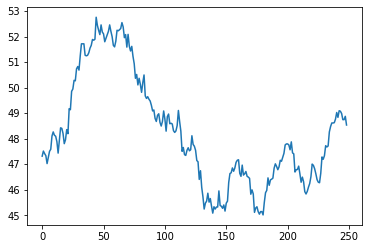

26


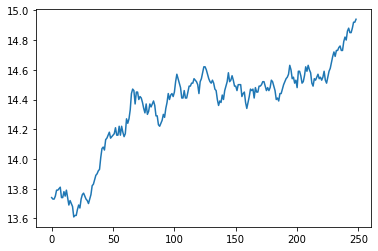

27


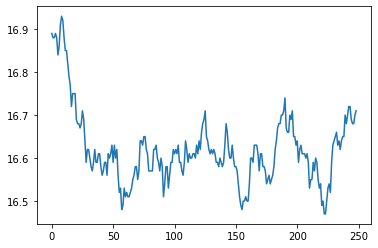

28


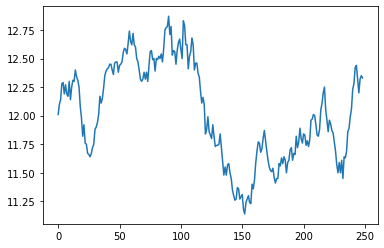

29


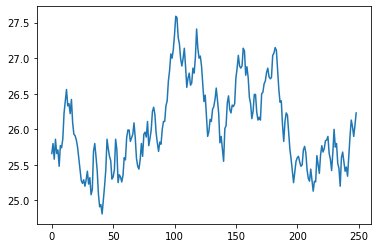

30


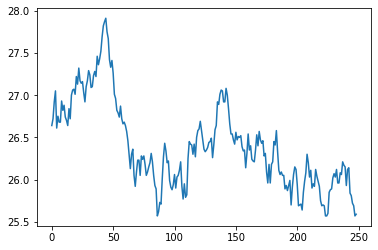

31


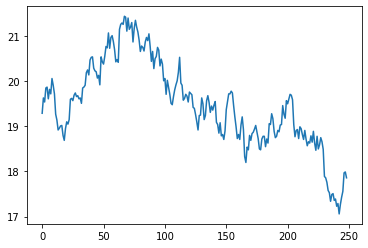

32


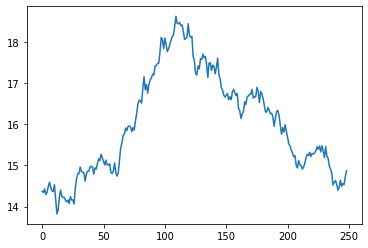

33


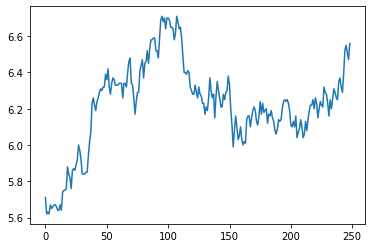

34


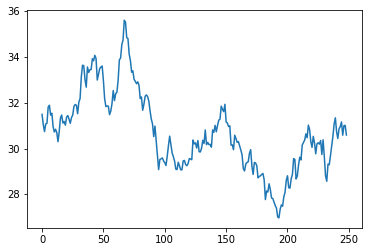

35


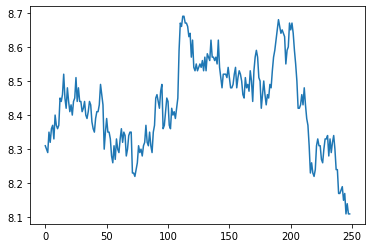

36


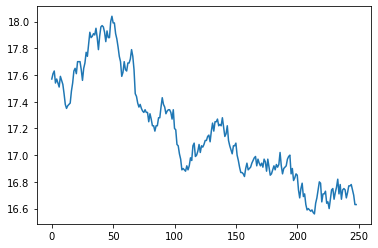

37


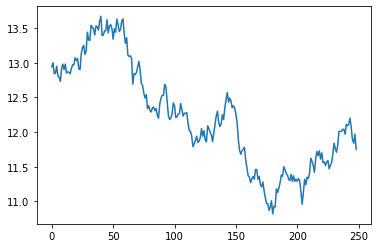

38


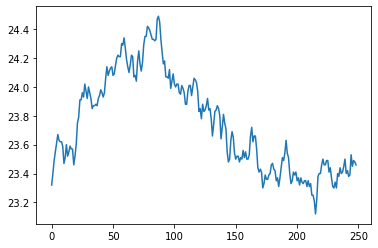

39


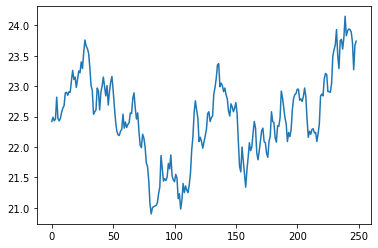

40


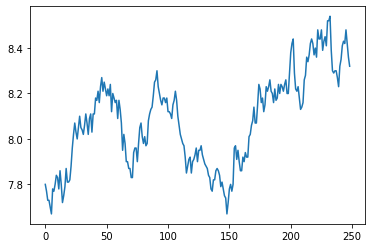

41


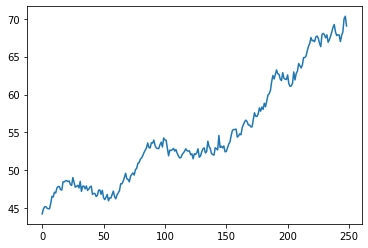

42


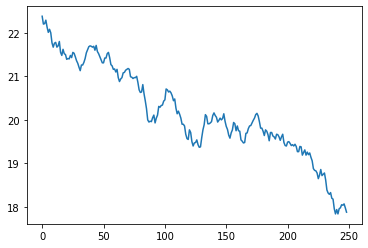

43


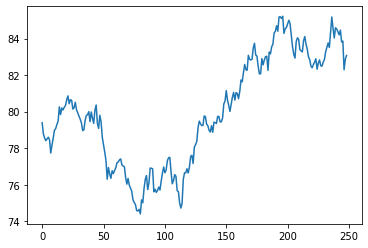

44


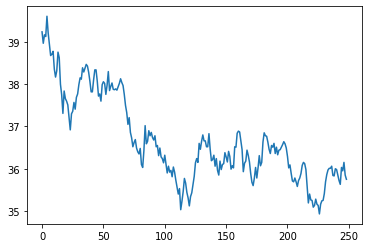

45


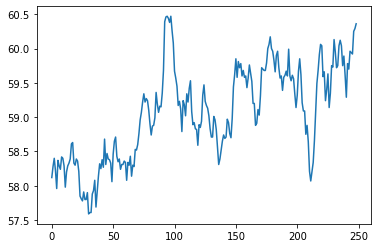

46


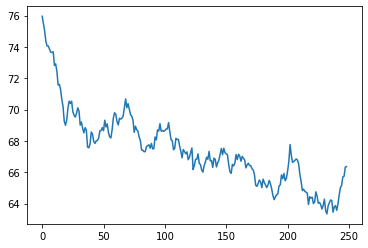

47


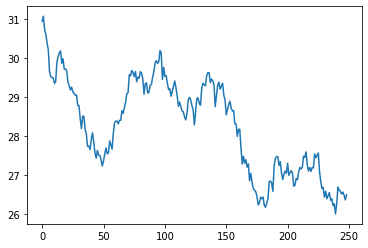

48


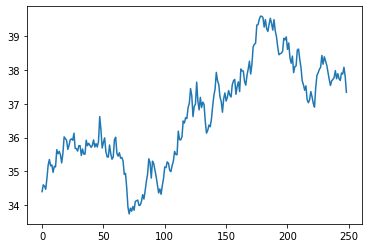

49


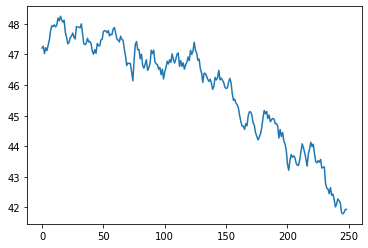

50


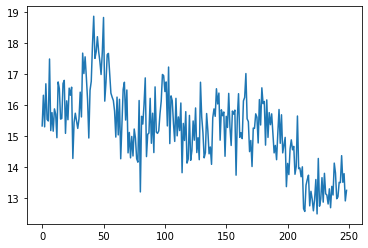

51


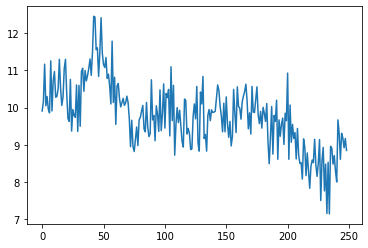

52


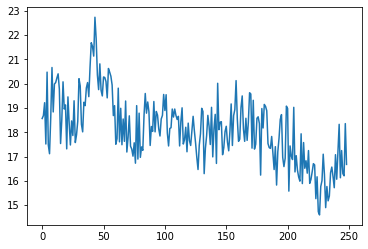

53


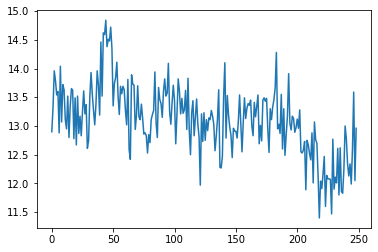

54


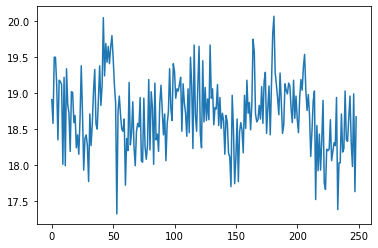

55


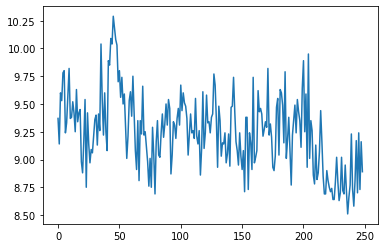

56


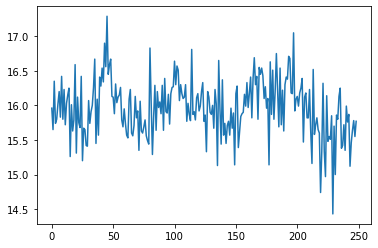

57


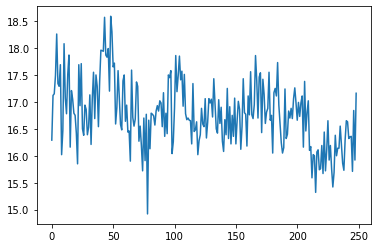

58


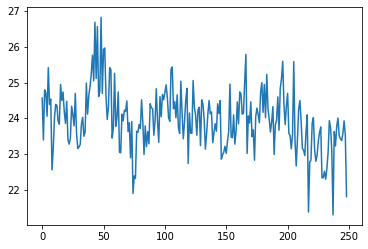

59


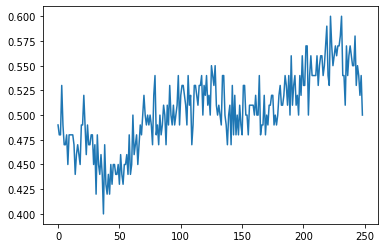

60


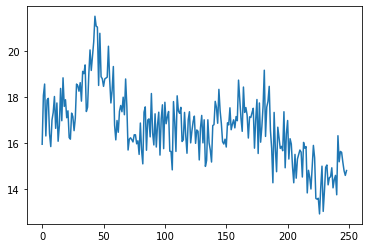

61


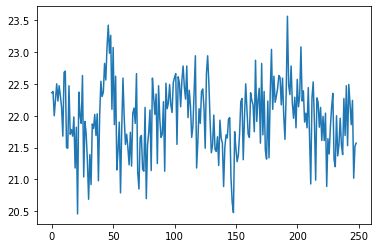

62


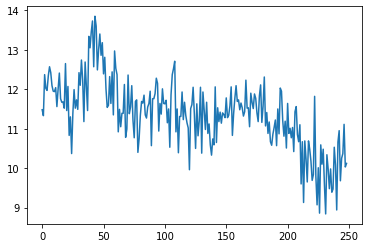

63


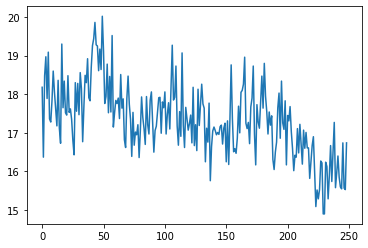

64


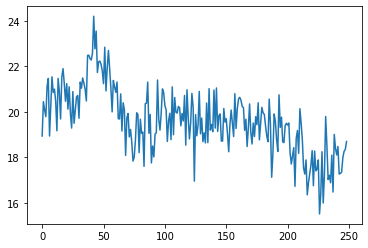

65


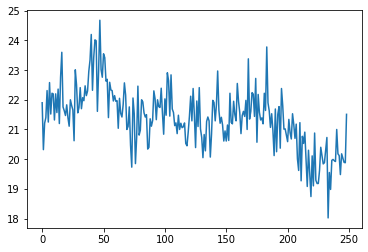

66


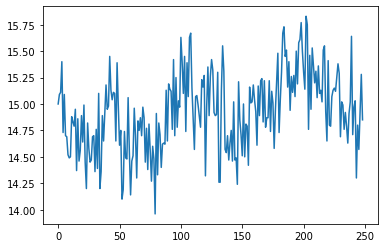

67


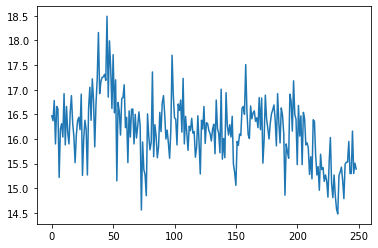

68


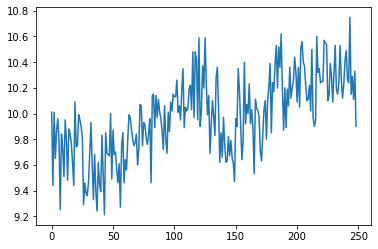

69


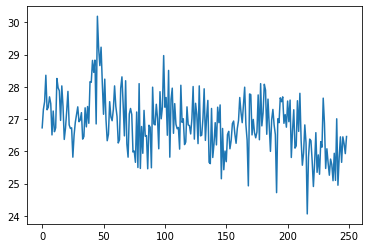

70


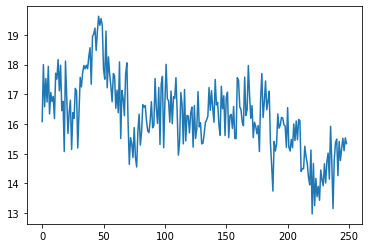

71


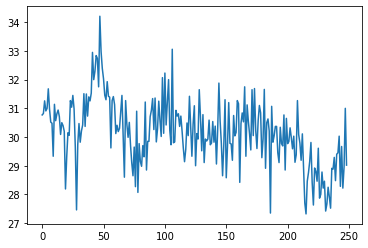

72


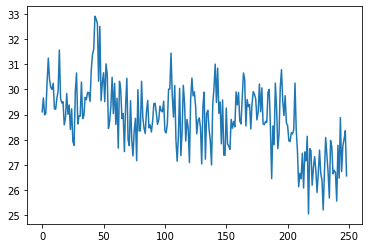

73


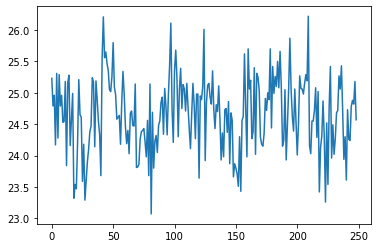

74


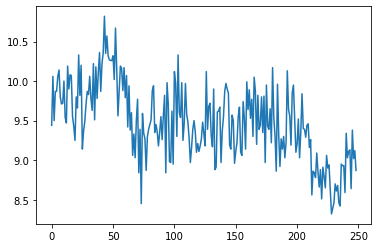

75


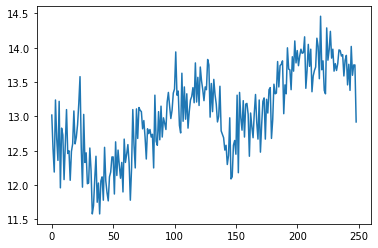

76


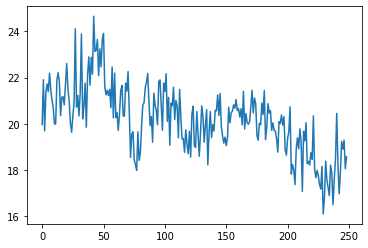

77


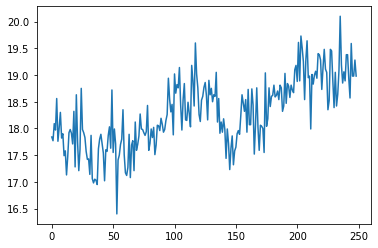

78


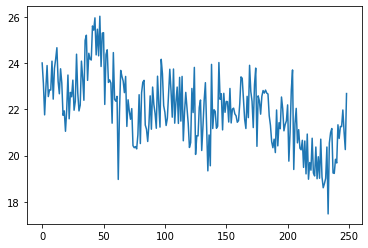

79


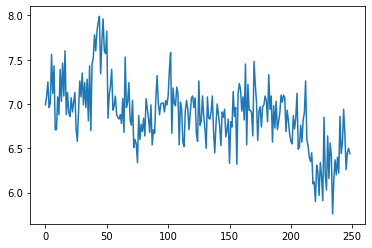

80


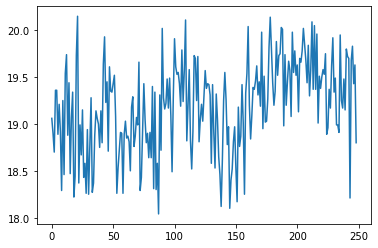

81


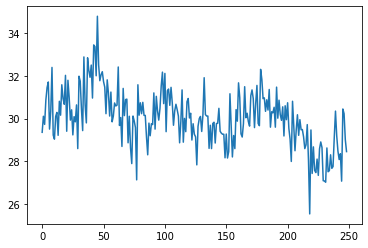

82


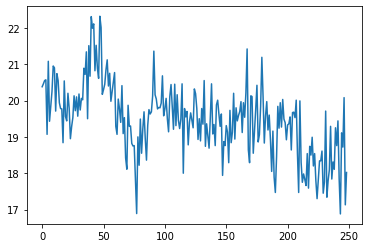

83


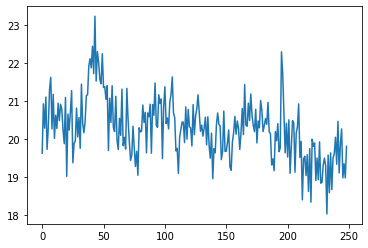

84


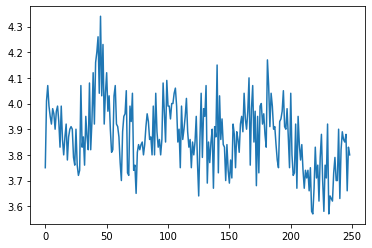

85


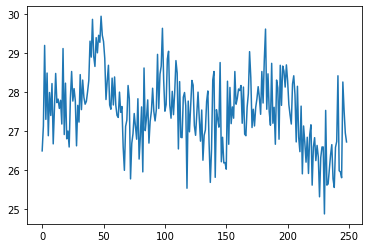

86


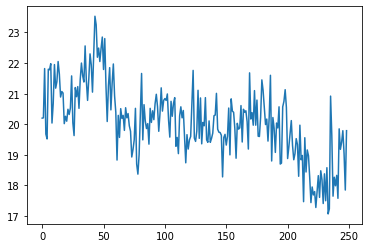

87


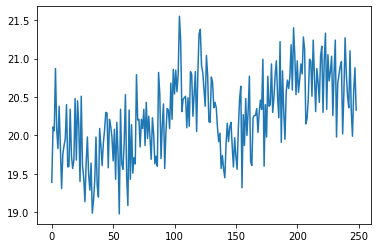

88


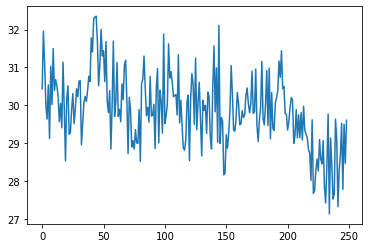

89


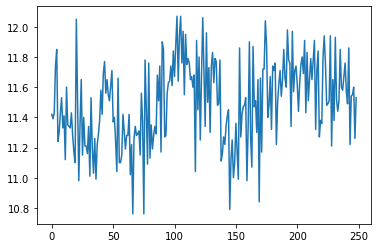

90


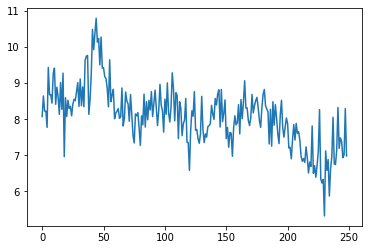

91


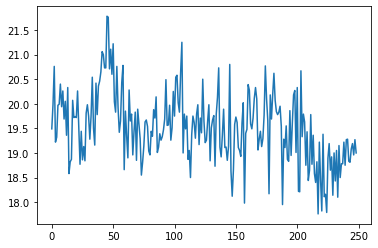

92


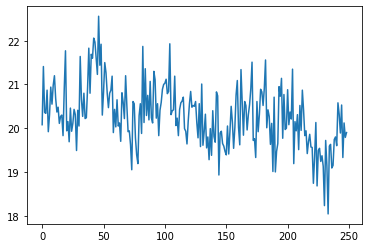

93


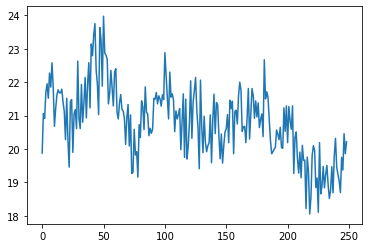

94


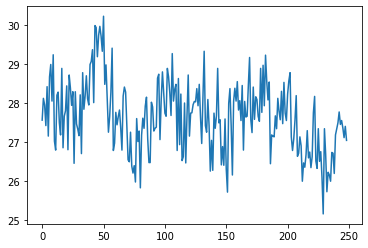

95


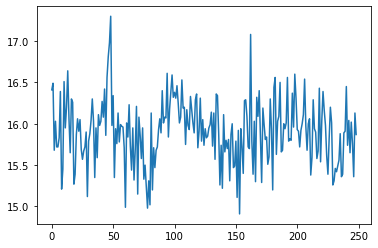

96


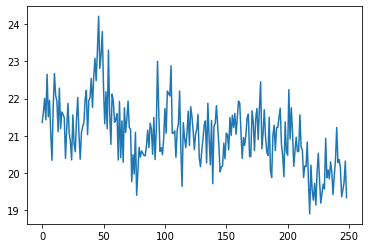

97


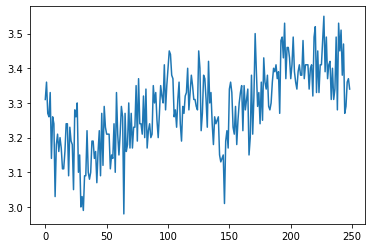

98


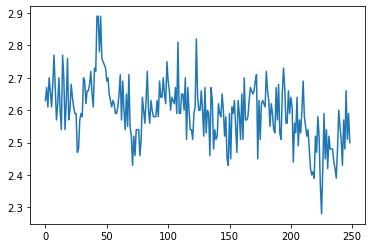

99


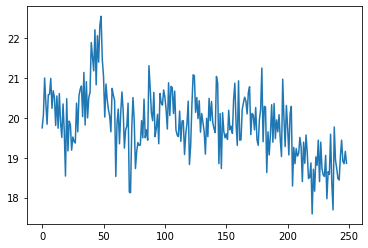

In [39]:
for i in range(100):
    sns.lineplot(data = data_double[:,i])
    print(i)
    plt.show()